In [3]:
import nuclei_features as nf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import config
import os

# Nuclei Features Extraction

This notebook is a simple example of how to extract features from the cythology images. 

These features are extracted for a set of real and synthetically generated images and the distribution of the features is compared to assert if the synthetic images are similar to the real ones.

In [2]:
real_img_files = os.listdir(config.REAL_IMGS_DIRECTORY)
gen_img_files = os.listdir(config.GEN_IMGS_DIRECTORY)

### Data example

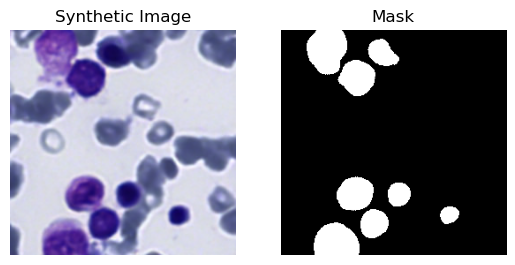

Features shape: (8, 18)


In [10]:
data = plt.imread(os.path.join(config.GEN_IMGS_DIRECTORY, gen_img_files[0]))
img = data[:, :256, :3]
mask = np.mean(data[:, 256:, :3], axis=2).astype(np.uint8)

# Plot images side by side
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[0].set_title('Synthetic Image')
ax[0].axis('off')
ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Mask')
ax[1].axis('off')
plt.show()

# Extract features from the real image
real_features_example = nf.extract_features(img, mask)
print(f'Features shape: {real_features_example.shape}')

### Extract feature from real and generated images

In [12]:
nuclei_features_real = []

for img_file in tqdm(real_img_files):
    total_path = os.path.join(config.REAL_IMGS_DIRECTORY, img_file)
    data = plt.imread(total_path)
    img = data[:, :256, :3]
    mask = np.mean(data[:, 256:, :3], axis=2).astype(np.uint8)
    img_features = nf.extract_features(img, mask)
    nuclei_features_real.append(img_features)

nuclei_features_real = np.concatenate(nuclei_features_real, axis=0)
total_num_nuclei_real = nuclei_features_real.shape[0]
# remove the rows with all zeros, i.e. problematic nuclei
nuclei_features_real = nuclei_features_real[~np.all(nuclei_features_real == 0, axis=1)]
num_discarded_real = total_num_nuclei_real - nuclei_features_real.shape[0]

print(f'Number of nuclei in real images: {total_num_nuclei_real}\nNumber of discarded nuclei: {num_discarded_real}')

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [01:35<00:00, 10.46it/s]

Number of nuclei in real images: 4498
Number of discarded nuclei: 90


In [13]:
nuclei_features_gen = []

for img_file in tqdm(gen_img_files):
    total_path = os.path.join(config.GEN_IMGS_DIRECTORY, img_file)
    data = plt.imread(total_path)
    img = data[:, :256, :3]
    mask = np.mean(data[:, 256:, :3], axis=2).astype(np.uint8)
    img_features = nf.extract_features(img, mask)
    nuclei_features_gen.append(img_features)

nuclei_features_gen = np.concatenate(nuclei_features_gen, axis=0)
total_num_nuclei_gen = nuclei_features_gen.shape[0]
# remove the rows with all zeros, i.e. problematic nuclei
nuclei_features_gen = nuclei_features_gen[~np.all(nuclei_features_gen == 0, axis=1)]
num_discarded_gen = total_num_nuclei_gen - nuclei_features_gen.shape[0]

print(f'Number of nuclei in generated images: {total_num_nuclei_gen}\nNumber of discarded nuclei: {num_discarded_gen}')

100%|██████████| 1000/1000 [01:49<00:00,  9.12it/s]

Number of nuclei in generated images: 5934
Number of discarded nuclei: 141


### Plot the features' distributions

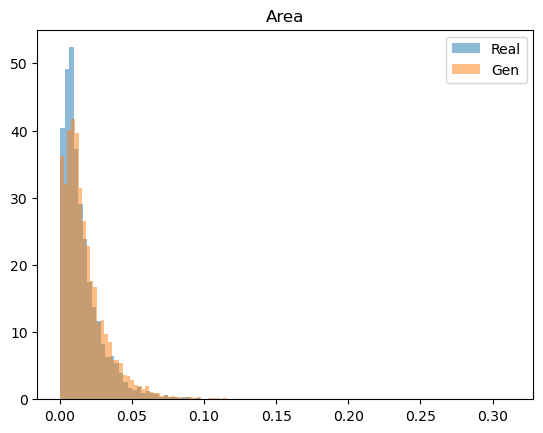

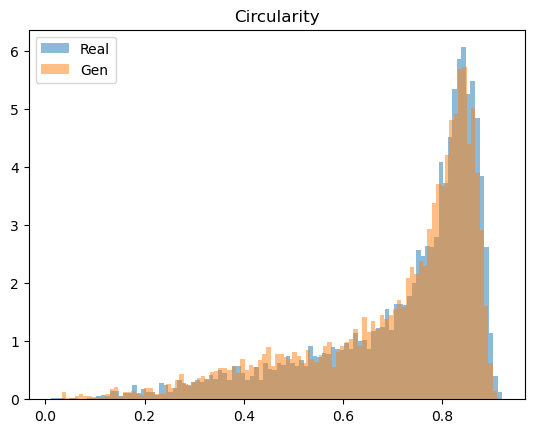

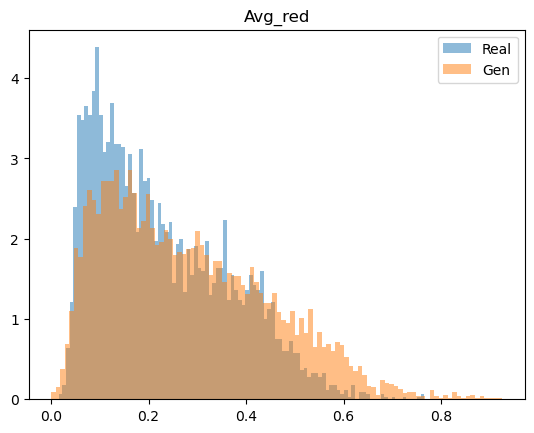

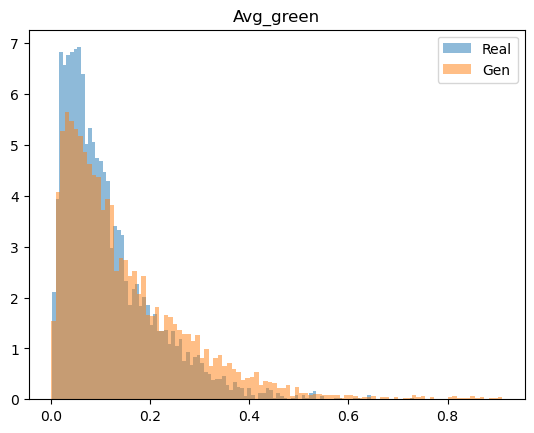

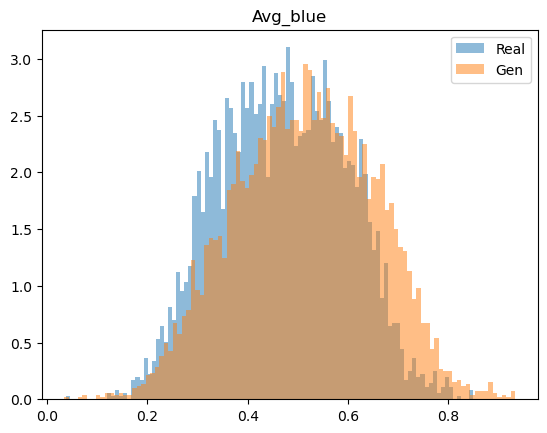

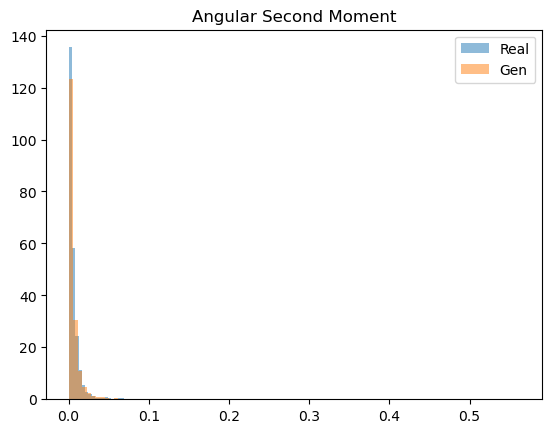

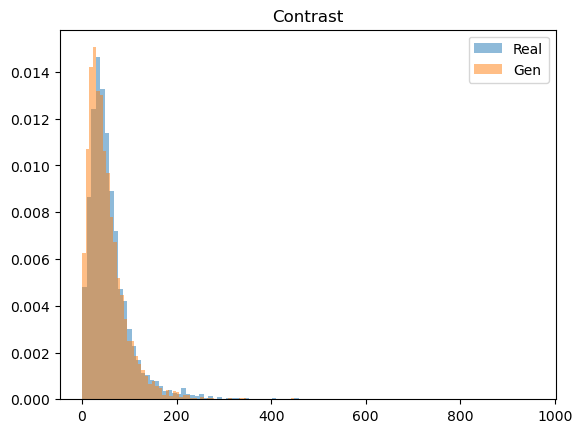

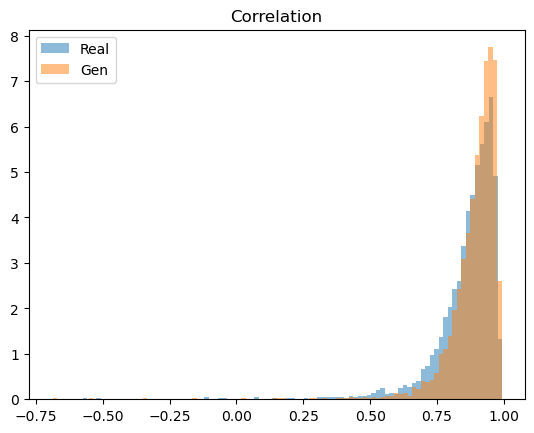

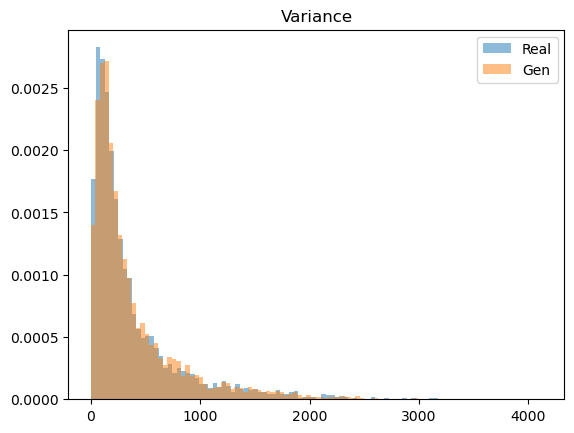

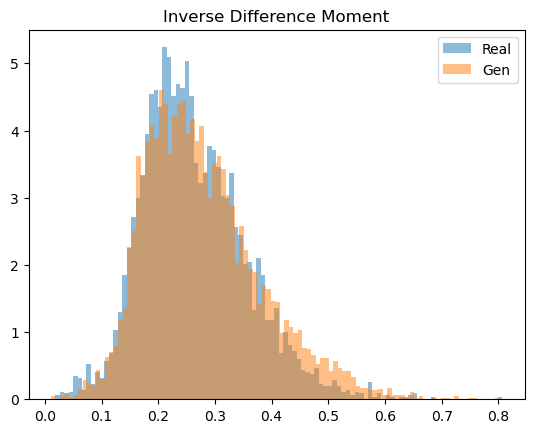

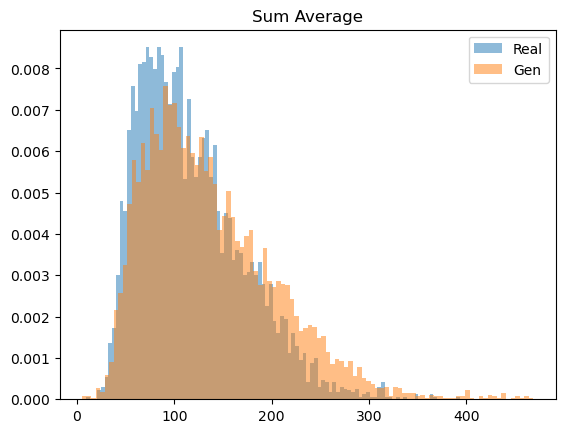

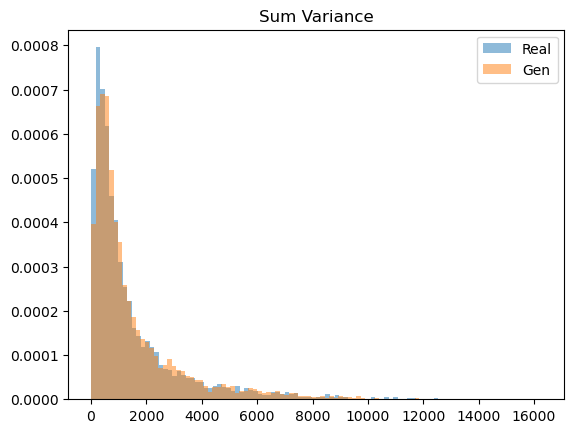

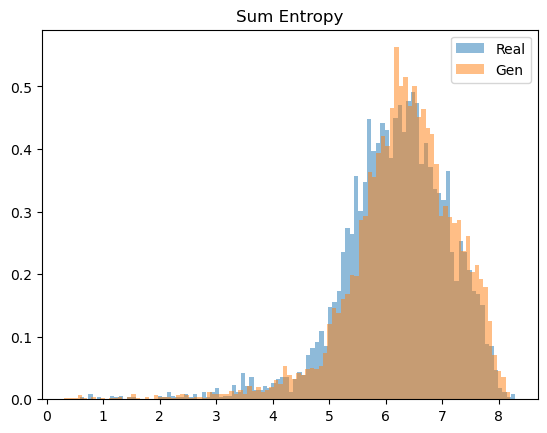

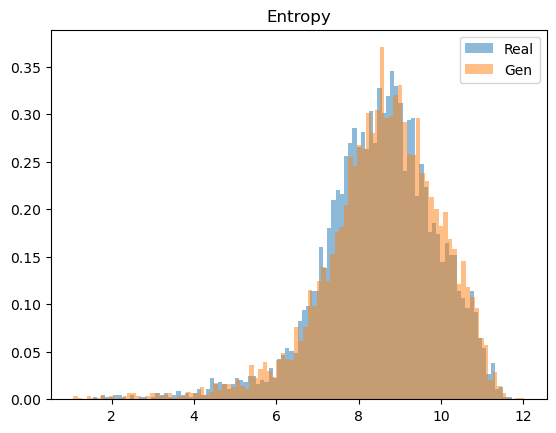

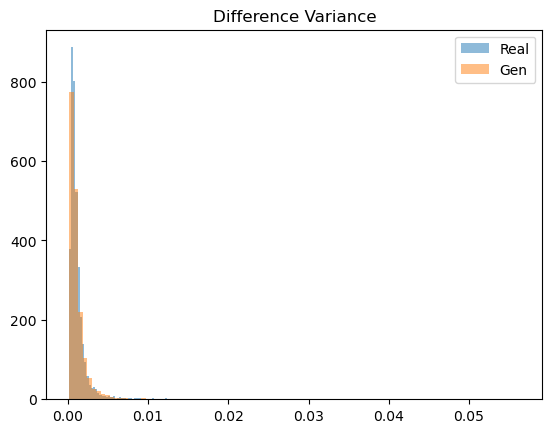

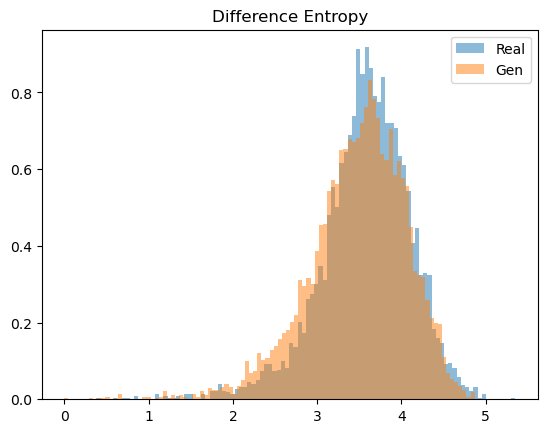

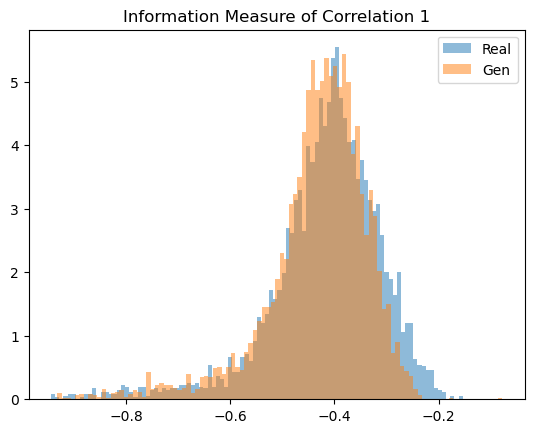

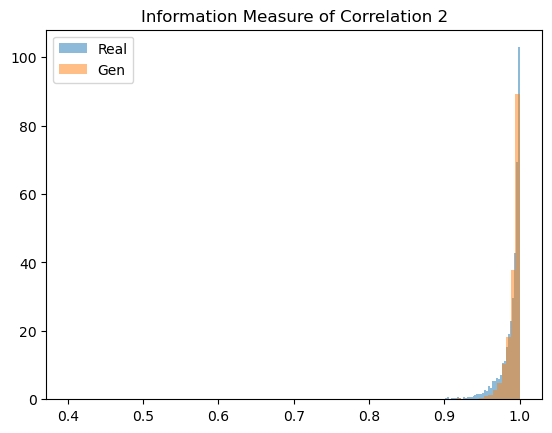

In [14]:
# plot the histograms of the features

for i in range(18):
    plt.hist(nuclei_features_real[:, i], bins=100, alpha=0.5, label='Real', density=True)
    plt.hist(nuclei_features_gen[:, i], bins=100, alpha=0.5, label=f'Gen', density=True)
    plt.title(nf.FEATURES_NAMES[i])
    plt.legend()
    plt.show()